# NanoFTIR spectrum quality control

## Load two reference spectra measured on Gold

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
import NeaSpectra as neas

(2048,)
228


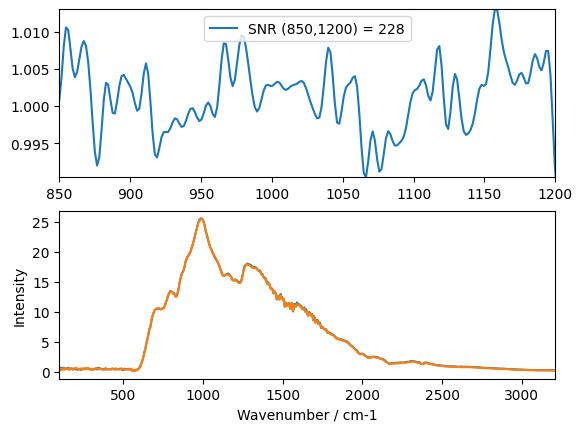

In [7]:
# Choose a measurement file
current_folder = os.getcwd()
file_name1 = r"E:\nanoFTIRqc\Purge\2024-05-11 103817 NF S REV10DPPC-goldref1.txt"
file_name2 = r"E:\nanoFTIRqc\Purge\2024-05-11 104604 NF S REV10DPPC-goldref2.txt"

s1 = neas.NeaSpectrum()
s1.readNeaSpectrum(file_name1)
s2 = neas.NeaSpectrum()
s2.readNeaSpectrum(file_name2)

print(np.shape(s1.data["O2A"]))
selfSpectrum = s1.data["O2A"]/s2.data["O2A"]

wnaxis = s1.data["Wavenumber"]
wnstart = 850
wnstop = 1200
wnstart_idx = np.argmin(abs(wnaxis-wnstart))
wnstop_idx = np.argmin(abs(wnaxis-wnstop))

SNR = round(np.median(selfSpectrum[wnstart_idx:wnstop_idx])/np.std(selfSpectrum[wnstart_idx:wnstop_idx]))

print(SNR)
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(wnaxis, selfSpectrum, label=f'SNR ({wnstart},{wnstop}) = {SNR}')
ax1.set_xlim([wnstart, wnstop])
ax1.set_ylim([min(selfSpectrum[wnstart_idx:wnstop_idx]), max(selfSpectrum[wnstart_idx:wnstop_idx])])
plt.ylabel("Intensity")
ax2.plot(wnaxis,s1.data["O2A"]/2,wnaxis,s2.data["O2A"]/2)
ax2.set_xlim([100, max(wnaxis)])
plt.xlabel("Wavenumber / cm-1")
ax1.legend()
plt.show()

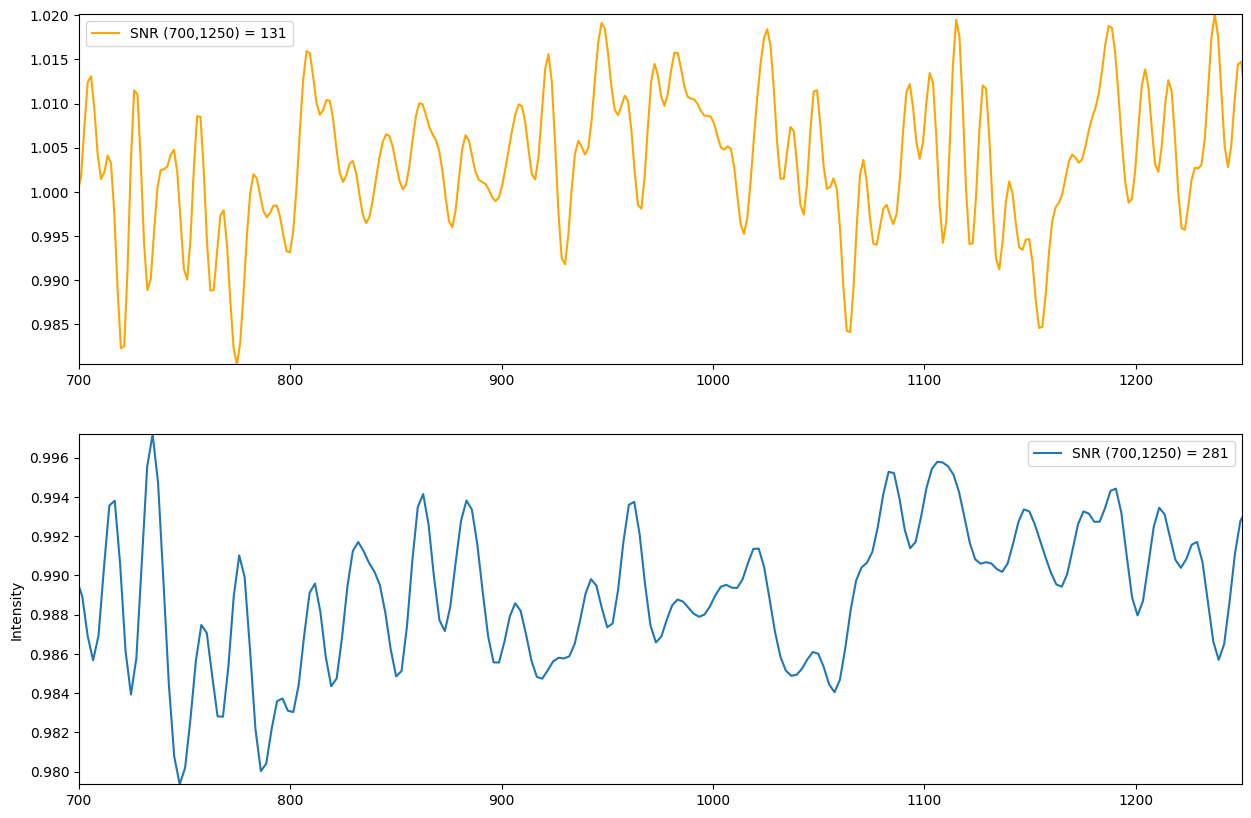

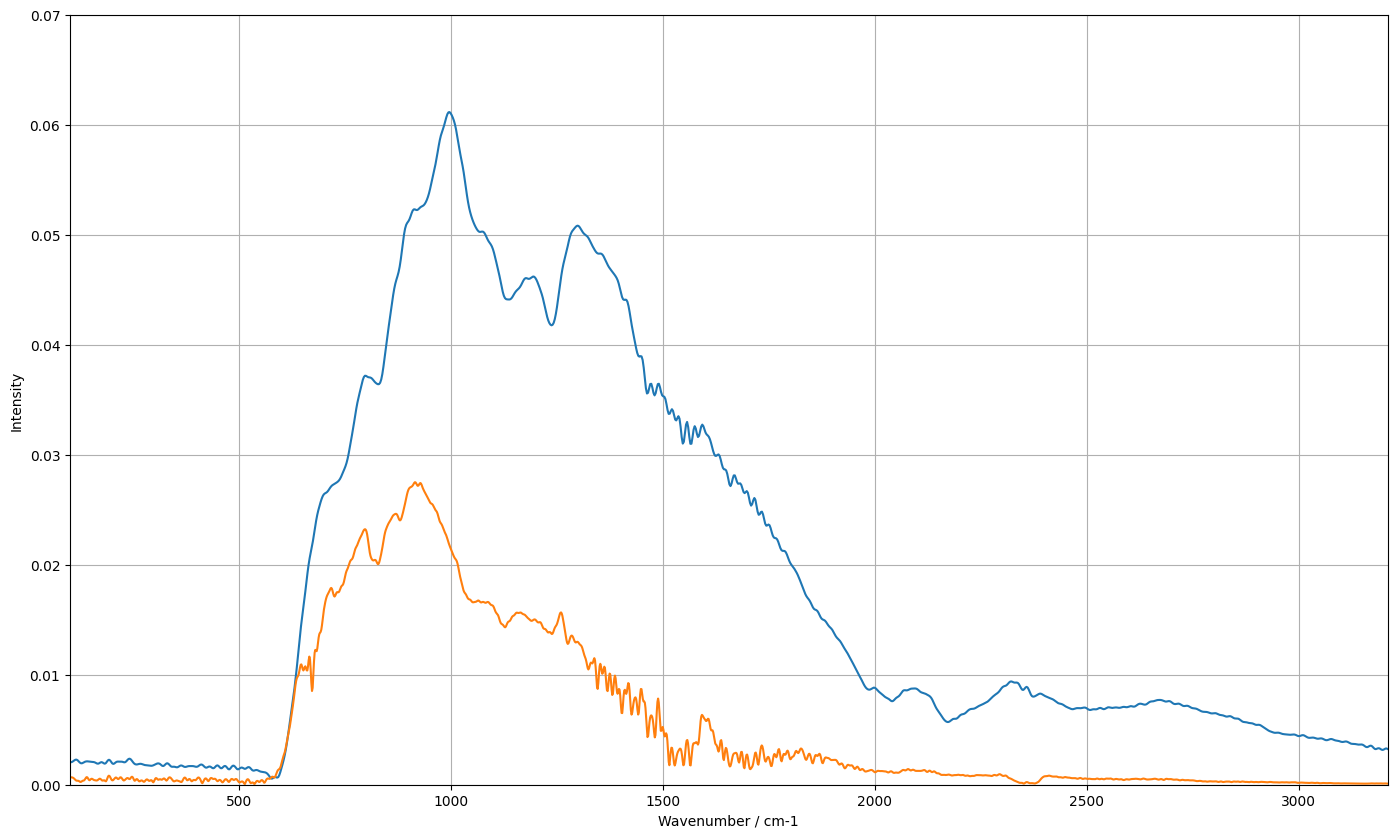

In [24]:
channel = "O2A"
# BEFORE files
file_name1 = r"C:\Users\ngerg\OneDrive\SOLEIL\Projects\SNOM-upgrades\BeamOptics\nanoFTIR-QualityControl\2024-04-15 001940 NF S goldtest3.txt"
file_name2 = r"C:\Users\ngerg\OneDrive\SOLEIL\Projects\SNOM-upgrades\BeamOptics\nanoFTIR-QualityControl\2024-04-15 002522 NF S goldtest4.txt"

s1 = neas.NeaSpectrum()
s1.readNeaSpectrum(file_name1)
s2 = neas.NeaSpectrum()
s2.readNeaSpectrum(file_name2)

selfSpectrum = s1.data[channel]/s2.data[channel]

wnaxis = s1.data["Wavenumber"]
wnstart = 700
wnstop = 1250
wnstart_idx = np.argmin(abs(wnaxis-wnstart))
wnstop_idx = np.argmin(abs(wnaxis-wnstop))

SNR = round(np.median(selfSpectrum[wnstart_idx:wnstop_idx])/np.std(selfSpectrum[wnstart_idx:wnstop_idx]))

# AFTER files
file_name3 = r'C:\Users\ngerg\OneDrive\SOLEIL\Projects\SNOM-upgrades\BeamOptics\nanoFTIR-QualityControl\2024-05-19 125845 NF S NeaSpec-Slow-Arrowhead-Clean-GoldRef1.txt'
file_name4 = r'C:\Users\ngerg\OneDrive\SOLEIL\Projects\SNOM-upgrades\BeamOptics\nanoFTIR-QualityControl\2024-05-19 130752 NF S NeaSpec-Slow-Arrowhead-Clean-GoldRef2.txt'

s3 = neas.NeaSpectrum()
s3.readNeaSpectrum(file_name3)
s4 = neas.NeaSpectrum()
s4.readNeaSpectrum(file_name4)

selfSpectrum2 = s3.data[channel]/s4.data[channel]
wnaxis2 = s3.data["Wavenumber"]
wnstart_idxS = np.argmin(abs(wnaxis2-wnstart))
wnstop_idxS = np.argmin(abs(wnaxis2-wnstop))

SNR2 = round(np.mean(selfSpectrum2[wnstart_idxS:wnstop_idxS])/np.std(selfSpectrum2[wnstart_idxS:wnstop_idxS]))

px = 1/plt.rcParams['figure.dpi']
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(1500*px, 1000*px))
ax1.plot(wnaxis, selfSpectrum, color='orange', label=f'SNR ({wnstart},{wnstop}) = {SNR}')
ax1.set_xlim([wnstart, wnstop])
ax1.set_ylim([min(selfSpectrum[wnstart_idx:wnstop_idx]), max(selfSpectrum[wnstart_idx:wnstop_idx])])
ax1.legend()
plt.ylabel("Intensity")
ax2.plot(wnaxis2, selfSpectrum2, label=f'SNR ({wnstart},{wnstop}) = {SNR2}')
ax2.set_xlim([wnstart, wnstop])
ax2.set_ylim([min(selfSpectrum2[wnstart_idxS:wnstop_idxS]), max(selfSpectrum2[wnstart_idxS:wnstop_idxS])])
ax2.legend()
plt.ylabel("Intensity")

plt.figure(figsize=(17, 10))
plt.plot(wnaxis2,s3.data[channel]/len(s3.data[channel]),wnaxis,s2.data[channel]/len(s2.data[channel]))
plt.axis([100, max(wnaxis),0,0.07])
plt.xlabel("Wavenumber / cm-1")
plt.ylabel("Intensity")
plt.grid()
plt.show()

In [2]:
s1.SaveSpectraToDAT("O2A")